In [1]:
from models import Enercon_Report; from pathlib import Path

folder_path = Path("data") / "input"
file_name = 'enercon_wind_example.pdf'
file_path = Path(folder_path) / file_name

enercon_report = Enercon_Report(file_path)

/home/utilisateur/Projets/pdf_transformation/venv/lib/python3.11/site-packages/pypdf/_crypt_providers/_cryptography.py:32: CryptographyDeprecationWarning: ARC4 has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.ARC4 and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  from cryptography.hazmat.primitives.ciphers.algorithms import AES, ARC4


In [2]:
enercon_report._get_converter_master_data()

,0,1
0,Serial number,825
1,Project number,S-04388-
2,Site,Bin
3,WEC,E-82 E2
4,Control system type CS82a,


In [3]:
enercon_report.get_metadata()

,Metadata
Serial number,825
Project number,S-04388-
Site,Bin
WEC,E-82 E2
Control system type CS82a,
Order type,WIND BASED MAINTENANCE
Order number,940114
Final date of order completion,"Feb 25, 2025"
Completion date of report,"Feb 25, 2025"
Inspection lot number,94000430


In [4]:
enercon_report.extract_inspection_table()

,0,1,2
0,Wind energy converter master data,,
1,Serial number,825WECE-82 E2,
2,Project number,S-04388-Control system type CS82a,
3,Site,Bin,
4,Details on order,,
5,Order type,WIND BASED MAINTENANCE,
6,Order number,940114,
7,Final date of order completion,"Feb 25, 2025",
8,Completion date of report,"Feb 25, 2025",
9,Inspection lot number,94000430,


In [5]:
enercon_report._open()
last_page = len(enercon_report.doc)
enercon_report._close()


In [6]:
camelot_params = {
            'flavor': 'stream',
            'split_text': False,   # Pour gérer le texte qui traverse les colonnes
            'strip_text': '\n',   # Pour nettoyer le texte des retours à la ligne
        }

enercon_report._convert_to_dataframe(enercon_report._extract_single_page_table(2, **camelot_params))

,0,1
0,Details on order,
1,Order type,WIND BASED MAINTENANCE
2,Order number,940114
3,Final date of order completion,"Feb 25, 2025"
4,Completion date of report,"Feb 25, 2025"
5,Inspection lot number,94000430
6,Document number,D0877 4.0
7,Performing team,T138 SST Gellai
8,Performing company,ENERCON SERVICE FRANCE EST


In [7]:
camelot_params = {
            'flavor': 'stream',
            # 'columns': ['250'], #195
            'table_areas': ['20,700,600,620'],
            'edge_tol': 700,
            'row_tol': 13,
            'split_text': True,   
            'strip_text': '\n',   
        }

enercon_report._convert_to_dataframe(enercon_report._extract_single_page_table(2, **camelot_params))

,0,1,2,3
0,Serial numb,825er,WEC,E-82 E2
1,Project num,S-04388-ber,Control syste,m type CS82a
2,Site,Bin,,


In [8]:
camelot_params = {
            'flavor': 'stream',
            # 'columns': ['65,450'],
            'table_areas': ['30,730,600,40'],
         'edge_tol': 800,
            'row_tol': 13,
            'split_text': False,   # Pour gérer le texte qui traverse les colonnes
            'strip_text': '\n',   # Pour nettoyer le texte des retours à la ligne
        }

enercon_report._get_multiple_pages_table(2, last_page, **camelot_params)

,0,1,2,3
0,Wind energy converter master data,,,
1,825WECSerial number,,E-82 E2,
2,S-04388-Project number,Control system type CS82a,,
3,BinSite,,,
4,Details on order,,,
5,Order typeWIND BASED MAINTENANCE,,,
6,Order number940114,,,
7,"Feb 25, 2025Final date of order completion",,,
8,"Feb 25, 2025Completion date of report",,,
9,94000430Inspection lot number,,,


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Paramètres Camelot - Page 2'}, xlabel='X-coordinate', ylabel='Y-coordinate'>)

<Figure size 1200x1600 with 0 Axes>

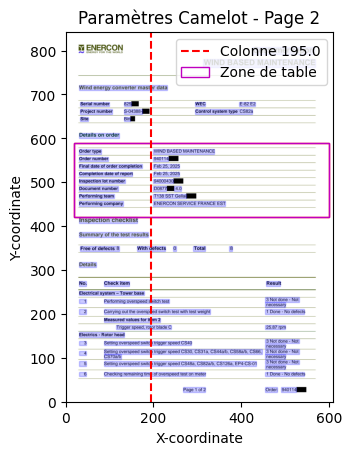

In [9]:
camelot_params = {
            'flavor': 'stream',
            'columns': ['195'], #195
            'table_areas': ['20,590,600,420'],
            'edge_tol': 700,
            'row_tol': 13,
            'split_text': True,   
            'strip_text': '\n',   
        }

   
enercon_report.visualize_camelot_parameters(
      page_number=2,
      **camelot_params)